### Exploratory Data Analysis for potable water quality prediction
#### Md. Asifur Rahman Asif


### Potable water is water that is safe for ingestion

### Imports

In [42]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
# from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load data

In [43]:
df = pd.read_csv("latest_water_potability.csv")

display(df.head(10))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


### Data Explanation

##### ph: pH of 1. water (0 to 14).
##### Hardness: Capacity of water to precipitate soap in mg/L.
##### Solids: Total dissolved solids in ppm.
##### Chloramines: Amount of Chloramines in ppm.
##### Sulfate: Amount of Sulfates dissolved in mg/L.
##### Conductivity: Electrical conductivity of water in μS/cm.
##### Organic_carbon: Amount of organic carbon in ppm.
##### Trihalomethanes: Amount of Trihalomethanes in μg/L.
##### Turbidity: Measure of light emiting property of water in NTU.
##### Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

### Data type of the features

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Data Preprocessing

##### Checking Nan Values

In [46]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

##### Filling the Nan values with mean values of the respective columns 

In [47]:
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

In [48]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [49]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [50]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [51]:
display(df.head(10))

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [52]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


#### Find Pearson Correlation Between The Variables

In [53]:
df_pearsoncor = df.corr()

display(df_pearsoncor)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


#### Find Spearman rank Correlation Between The Variables

In [54]:
df_spearmancor = df.corr(method = 'spearman')

display(df_spearmancor)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.106929,-0.063675,-0.036997,0.022249,0.013797,0.038681,0.006284,-0.046972,-0.003700
Hardness,0.106929,1.000000,-0.052584,-0.024556,-0.073857,-0.032884,0.003340,-0.010295,-0.012855,-0.010606
Solids,-0.063675,-0.052584,1.000000,-0.055037,-0.130586,0.021089,0.017881,-0.018985,0.028470,0.026234
Chloramines,-0.036997,-0.024556,-0.055037,1.000000,0.026533,-0.016928,-0.011910,0.017682,-0.007909,0.024980
Sulfate,0.022249,-0.073857,-0.130586,0.026533,1.000000,-0.016552,0.012287,-0.020319,-0.016757,-0.012522
Conductivity,0.013797,-0.032884,0.021089,-0.016928,-0.016552,1.000000,0.021311,-0.004260,0.010342,-0.010386
Organic_carbon,0.038681,0.003340,0.017881,-0.011910,0.012287,0.021311,1.000000,-0.007326,-0.024730,-0.026774
Trihalomethanes,0.006284,-0.010295,-0.018985,0.017682,-0.020319,-0.004260,-0.007326,1.000000,-0.027047,0.005561
Turbidity,-0.046972,-0.012855,0.028470,-0.007909,-0.016757,0.010342,-0.024730,-0.027047,1.000000,0.001088
Potability,-0.003700,-0.010606,0.026234,0.024980,-0.012522,-0.010386,-0.026774,0.005561,0.001088,1.000000


#### Target Variable Visualization

In [57]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

Dataset is imbalanced  
Ratio is 1.5:1

In [58]:
print(df.shape)

(3276, 10)


### Data Visualization

#### HISTOGRAMS AND DISTRIBUTION PLOTS

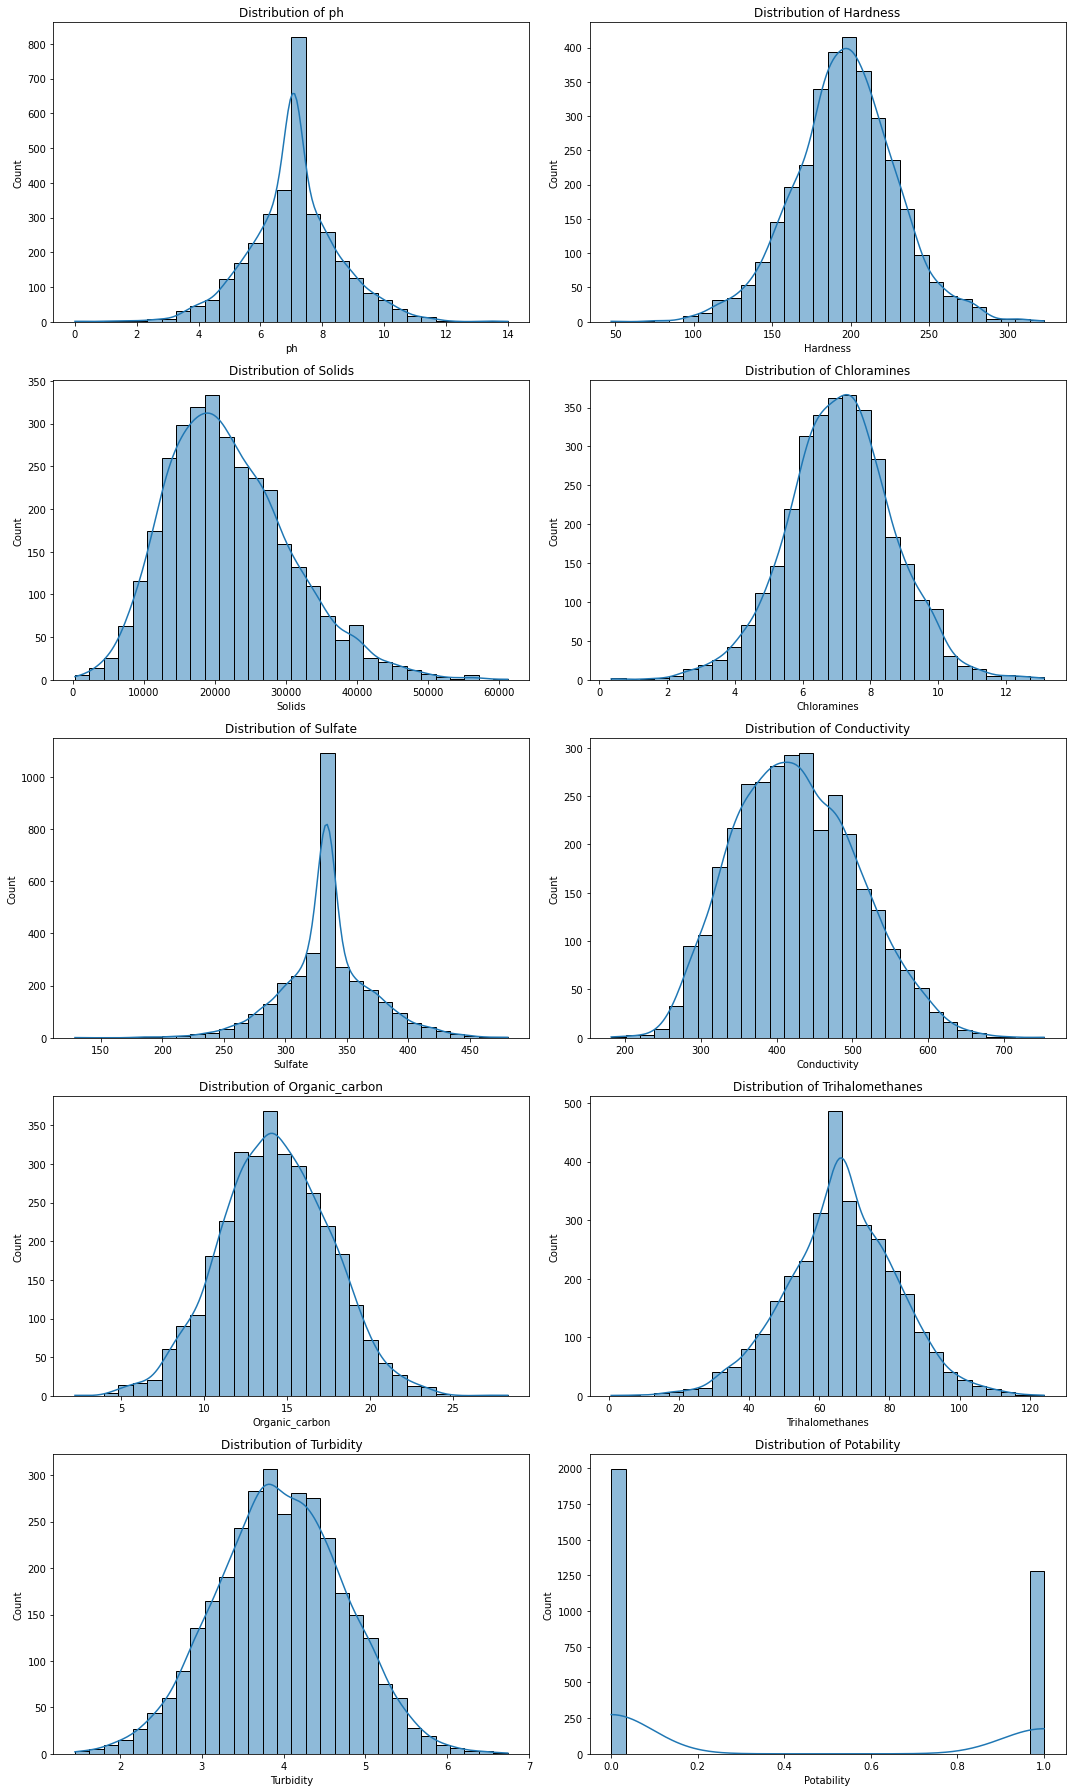

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for subplots
num_rows = 5  # Adjust the number of rows as needed
num_cols = 2  # Adjust the number of columns as needed

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### PAIR PLOTS

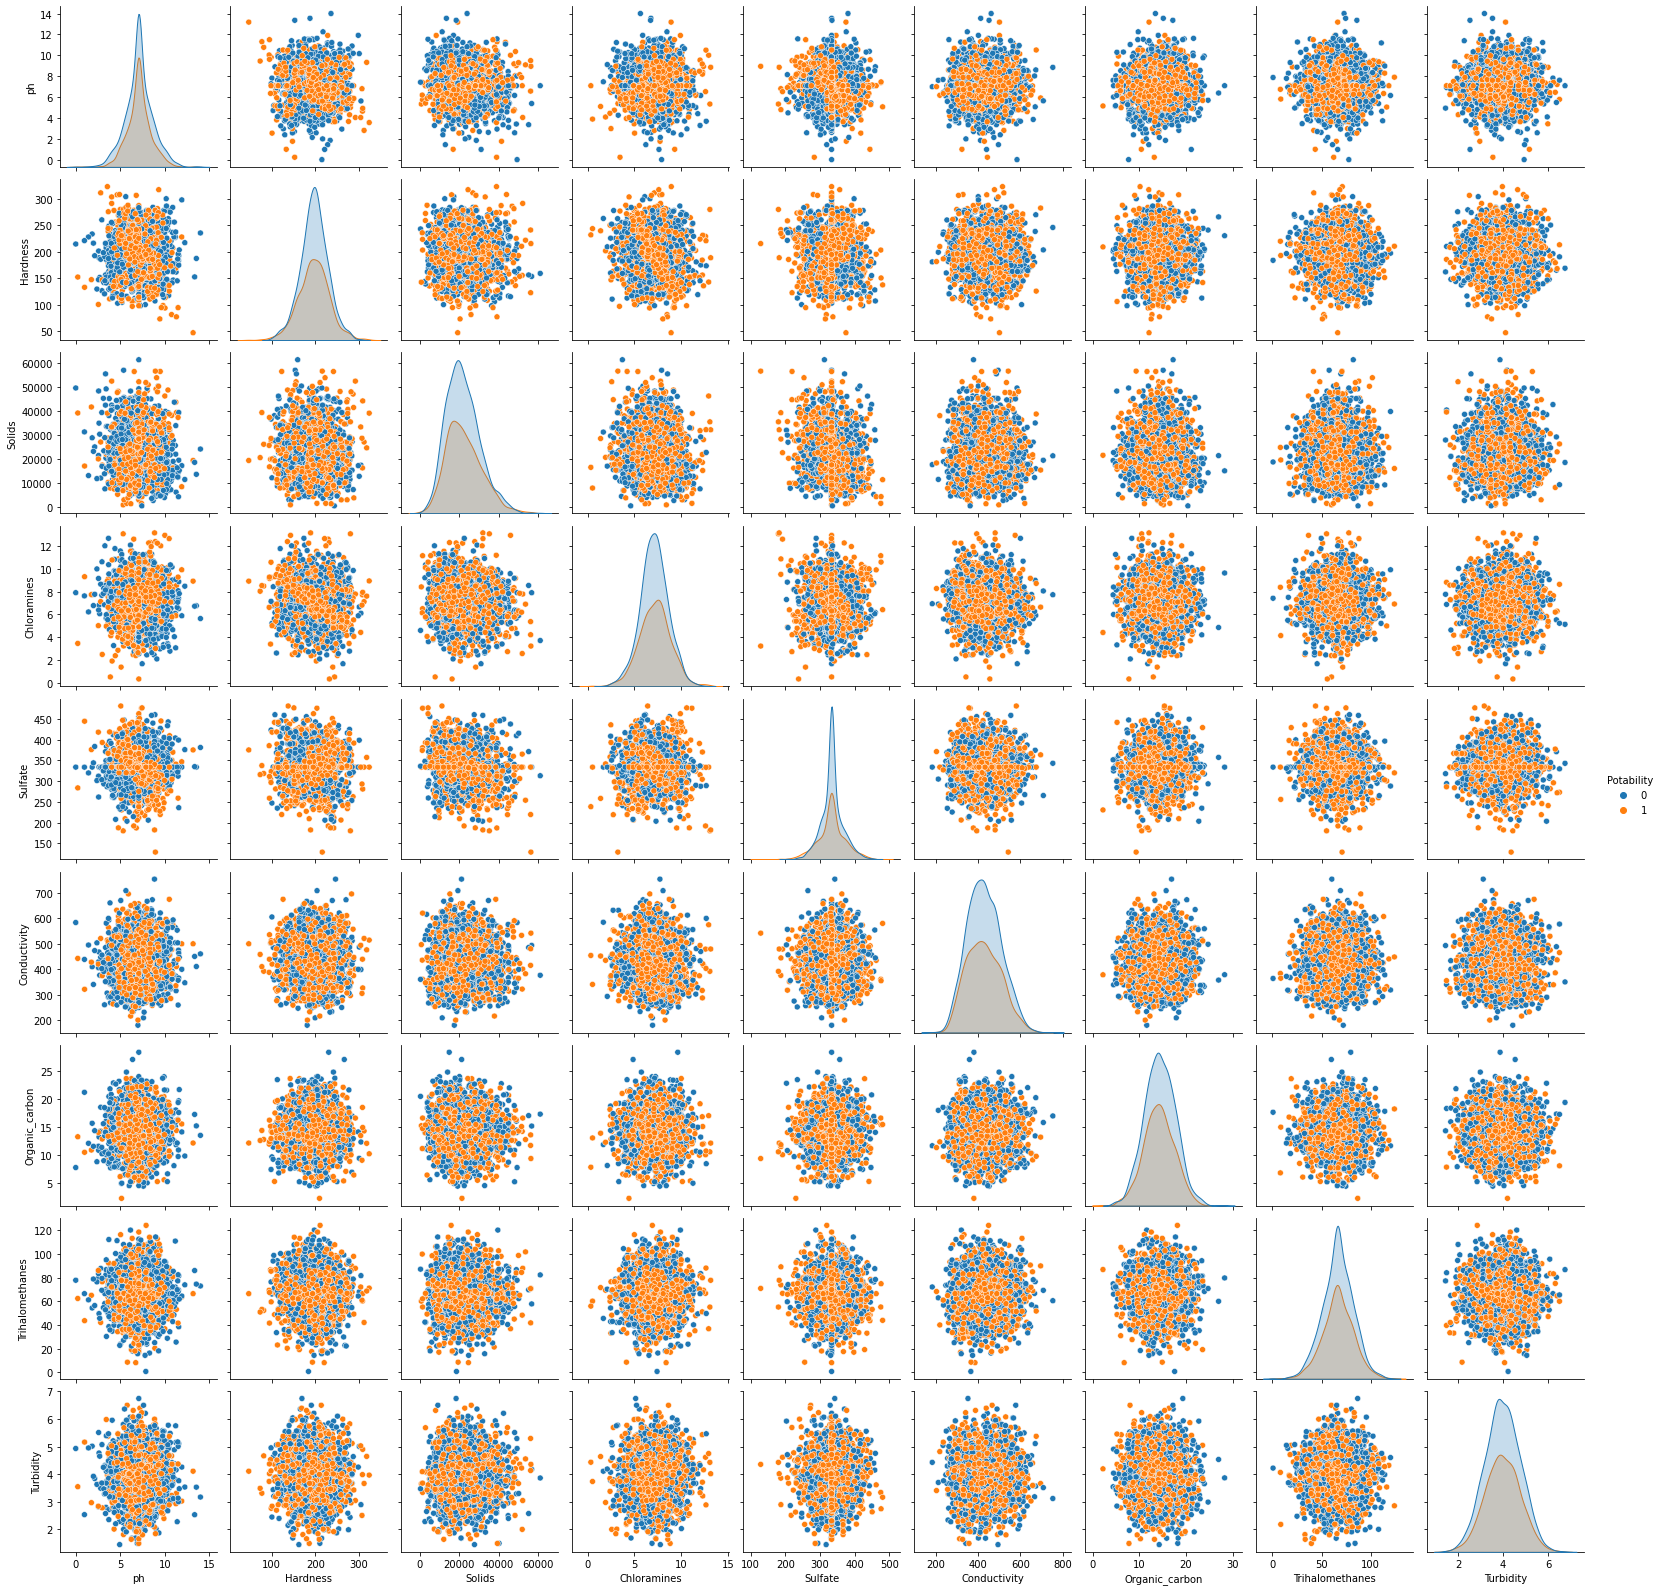

In [71]:
sns.pairplot(df, hue='Potability', diag_kind='kde')
plt.show()

#### CORRELATION HEATMAP

#### Heatmap of Correlation For Pearson Correlation

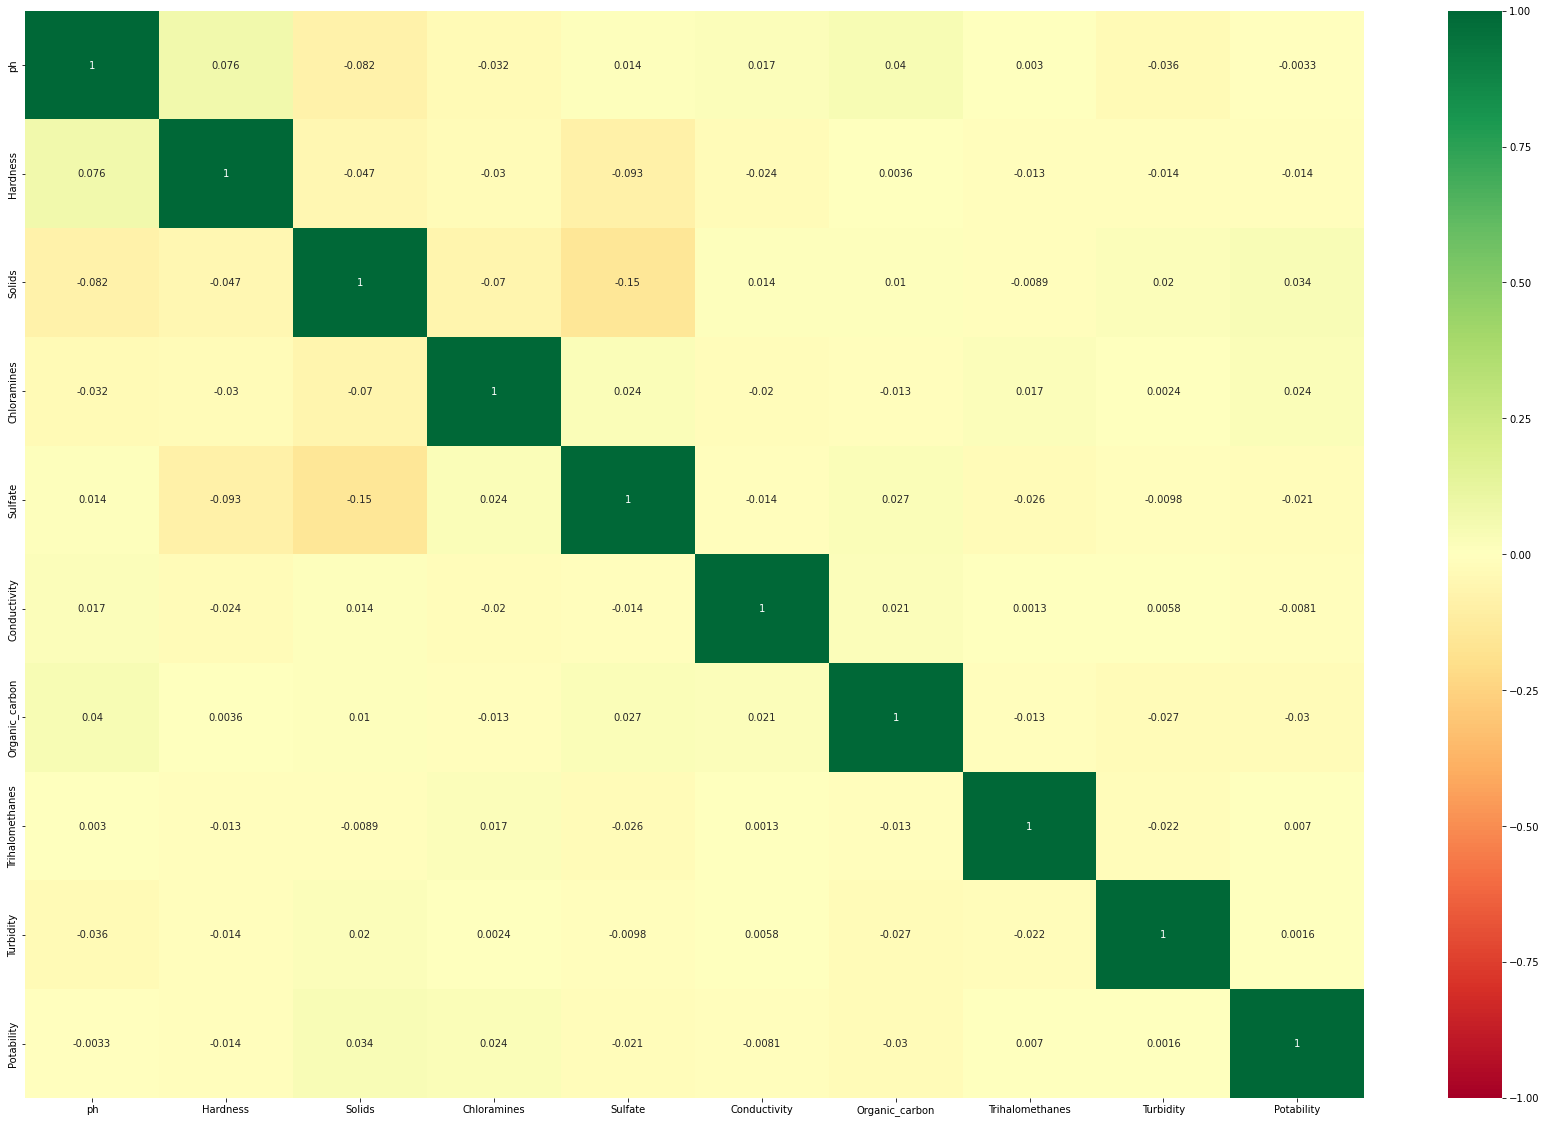

In [73]:
plt.figure(figsize=(30,20))
sns.heatmap(df_pearsoncor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1)
plt.show()

#### SCATTER PLOTS

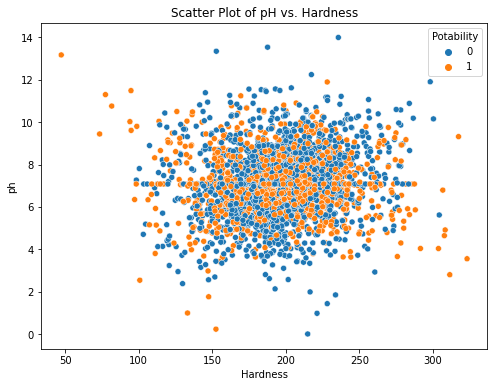

In [74]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hardness', y='ph', hue='Potability')
plt.title('Scatter Plot of pH vs. Hardness')
plt.show()

#### DISTRIBUTION PLOTS BY TARGET VARIABLE

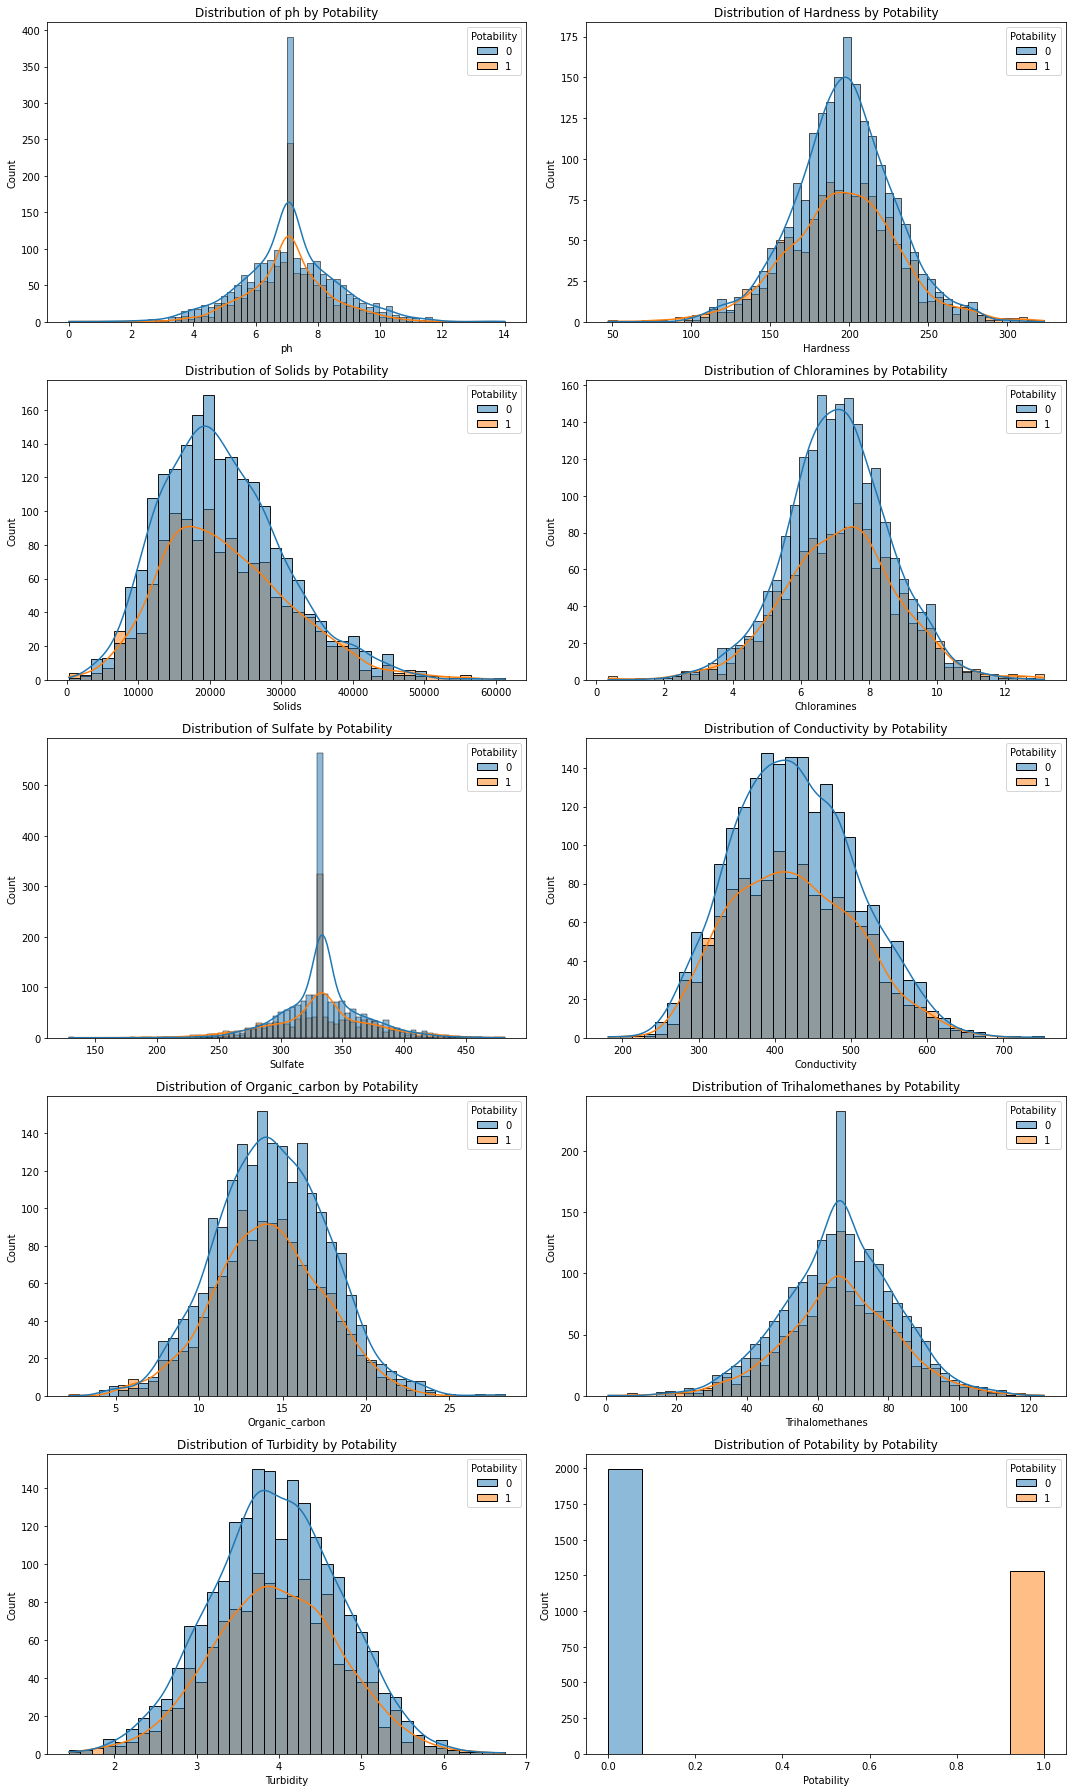

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns


# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns for subplots
num_cols = 2  # Adjust the number of columns as needed
num_rows = (len(numeric_cols) - 1) // num_cols + 1

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms with 'Potability' as hue
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, hue='Potability', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Potability')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### PARALLEL COORDINATES PLOT

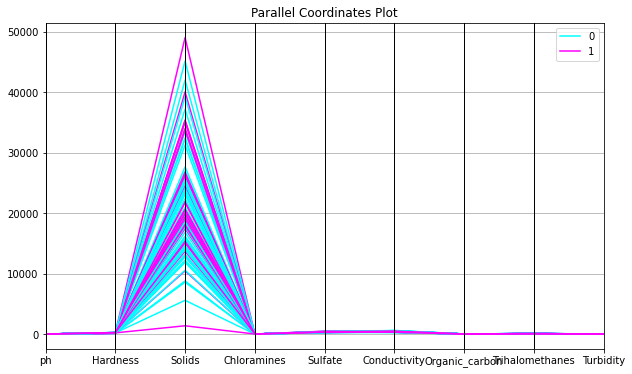

In [76]:
from pandas.plotting import parallel_coordinates

# Example: Parallel Coordinates Plot
plt.figure(figsize=(10, 6))
parallel_coordinates(df.sample(100), 'Potability', colormap='cool')
plt.title('Parallel Coordinates Plot')
plt.show()

#### ANDREWS CURVES

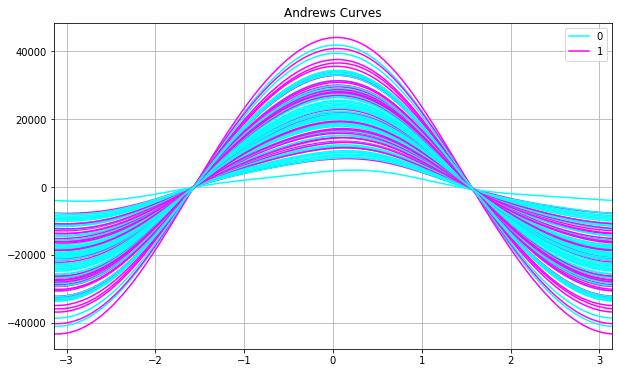

In [77]:
from pandas.plotting import andrews_curves

# Example: Andrews Curves
plt.figure(figsize=(10, 6))
andrews_curves(df.sample(100), 'Potability', colormap='cool')
plt.title('Andrews Curves')
plt.show()

#### RADVIZ PLOT

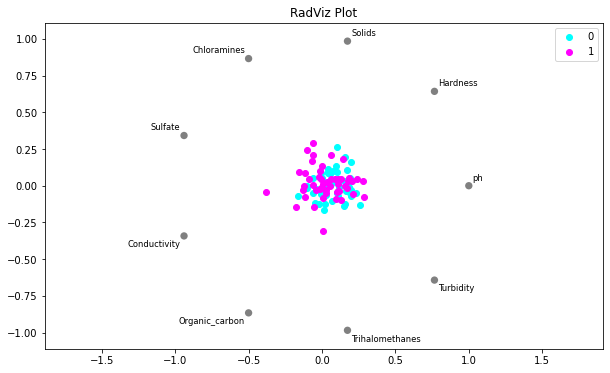

In [78]:
from pandas.plotting import radviz

# Example: RadViz Plot
plt.figure(figsize=(10, 6))
radviz(df.sample(100), 'Potability', colormap='cool')
plt.title('RadViz Plot')
plt.show()

#### SWARM PLOT WITH STRIP PLOT

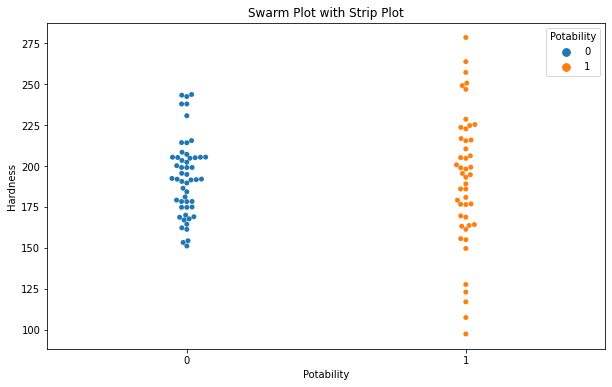

In [82]:
# Example: Swarm Plot with Strip Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df.sample(100), x='Potability', y='Hardness', hue='Potability')
plt.title('Swarm Plot with Strip Plot')
plt.show()

#### 3D SCATTER PLOT

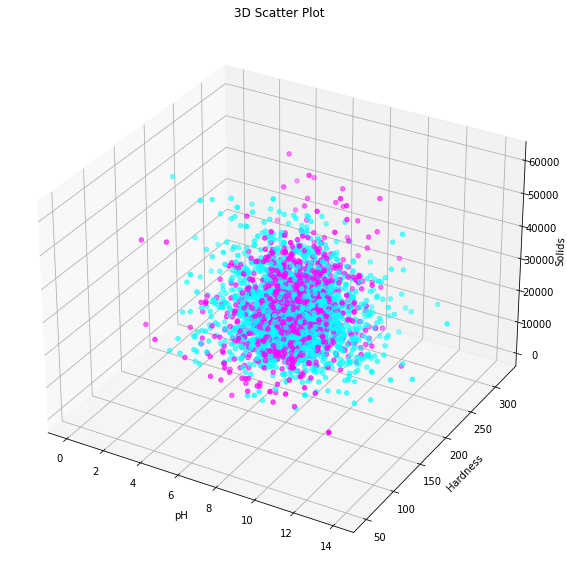

In [89]:
from mpl_toolkits.mplot3d import Axes3D

# Example: 3D Scatter Plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['ph'], df['Hardness'], df['Solids'], c=df['Potability'], cmap='cool')
ax.set_xlabel('pH')
ax.set_ylabel('Hardness')
ax.set_zlabel('Solids')
plt.title('3D Scatter Plot')
plt.show()

This line is called KDE(Kernel Density Estimation)

#### Estimate Distribution Modality

<img src="image.jpg">

Source: https://mathematica.stackexchange.com/questions/173275/a-simple-fast-way-to-estimate-distribution-modality

#### A general relationship of mean and median under differently skewed unimodal distribution

<img src="skew.png">

Source: https://en.wikipedia.org/wiki/Skewness